# Transformation 
#### Andrew Ribeiro 
#### July 2019
#### Source: "An Introduction to Cybernetics" by W. Ross Ashby.
<center>
A transition: $\text{operand} \xrightarrow[]{\text{operator}} \text{transform}$
</center>

In [1]:
from transformation import FiniteTransformation,InfiniteTransformation
import numpy as np
import math

In [2]:
CharTranspose = FiniteTransformation(map(chr, list(range(65, 91))), lambda operand: chr(((ord(operand) + 1) - 65) % 26 + 65))

In [3]:
CharTranspose.operator("Z")

'A'

In [4]:
CharTranspose.transitions()

[('A', 'B'),
 ('B', 'C'),
 ('C', 'D'),
 ('D', 'E'),
 ('E', 'F'),
 ('F', 'G'),
 ('G', 'H'),
 ('H', 'I'),
 ('I', 'J'),
 ('J', 'K'),
 ('K', 'L'),
 ('L', 'M'),
 ('M', 'N'),
 ('N', 'O'),
 ('O', 'P'),
 ('P', 'Q'),
 ('Q', 'R'),
 ('R', 'S'),
 ('S', 'T'),
 ('T', 'U'),
 ('U', 'V'),
 ('V', 'W'),
 ('W', 'X'),
 ('X', 'Y'),
 ('Y', 'Z'),
 ('Z', 'A')]

In [5]:
CharTranspose.closed()

True

### 2/4. Closure. 
**Ex.1:** If the operands are the positive integers 1, 2, 3, and 4, and the operator is
“add three to it”, the transformation is:

$$\downarrow 1 \; 2 \; 3 \; 4 \\  \;\; 4 \; 5 \; 6 \; 7$$
Is it closed?

In [6]:
AddThree = FiniteTransformation([1,2,3,4], lambda operand: operand + 3)

In [7]:
AddThree.operator(2)

5

In [8]:
AddThree.closed()

False

**Ex.2:** The operands are those English letters that have Greek equivalents (i.e. excluding j,q,etc.), and the operator is "turn each English letter to its Greek equivalent." Is the transformation closed?  

In [9]:
englishChar = ["A","B","D","E","G","I","K","L","M","N","O","P","R","S","T","U","X","Z"]
greekChar = ["Α","Β","Δ","Ε","Γ","Ι","Κ","Λ","Ω","N","O","Π","Ρ","Σ","T","Υ","Ξ","Ζ"]
charDict = {}

for i in range(len(englishChar)):
    charDict[englishChar[i]] = greekChar[i]
        
EnglishToGreek = FiniteTransformation(englishChar, lambda operand: charDict[operand])

In [10]:
EnglishToGreek.operator("S")

'Σ'

In [11]:
EnglishToGreek.closed()

False

**Ex.3:** Are the following transformations closed or not:

A: $\downarrow a \; b \; c \; d \\  \;\;  a\; a \; a \; a$ 
B: $\downarrow f \; g \; p \; q \\  \;\;  g\; f \; q \; p$
C: $\downarrow f \; g \; p \\  \;\;  g\; f \; q $
D: $\downarrow f \; g  \\  \;\;  g\; f $

**Answer:** A,B, and D are closed because each transform is an element of the set of operands. C is not closed because "q" is not an element of the set of operands. 

**Ex.4:** Write down, in the form of Ex.3, a transformation that has only one operation and is closed. 

**Answer:** $a \rightarrow a$, the identity. 

**Ex.5:** Mr. C, of the Eccentrics’ Chess Club, has a system of play that rigidly prescribes, for every possible position, both for White and slack (except for those positions in which the player is already mated) what is the player’s best next move. The theory thus defines a transformation from position to position. On being assured that the transformation was a closed one, and that C always plays by this system, Mr. D. at once offered to play C for a large stake. Was D wise?

**Answer:** By making optimal moves, C is an optimal player. Is it wise to play the best possible player for a large stake? No. Although, let's say Mr. D had access to the same set of rules. Is it wise in this case? I am unsure, but I believe two optimal players can always draw in chess. If this is the case, under these new conditions, it would be a waste of time to play, since the outcome would be assured to be a draw. 

### 2/5. Closure & Infinite Transformations 

In [14]:
PlusThree = InfiniteTransformation(lambda x: x, lambda x: x + 3)

In [16]:
PlusThree.operator(41)

44

In [21]:
EvenPlusThree = InfiniteTransformation(lambda x: x*2, lambda x: x + 3)

In [22]:
EvenPlusThree.operator(4)

7

**Ex.1:** In A the operands are the even numbers from 2 onwards, and the transforms are their squares:

A: $\downarrow 2 \; 4 \; 6 \; \ldots \\  \;\;  4\; 16 \; 36 \; \ldots$

Is A closed?

In [23]:
EvenSquares = InfiniteTransformation(lambda x: x*2, lambda x: x**2)

In [24]:
EvenSquares.operator(6)

36

This transformation is closed because $x^2$ is always an even number. For example: $4^2 = 16 = 2\cdot8$.

**Ex. 2:** In transformation B the operands are all the positive integers $1, 2, 3,\ldots$ and each one’s transform is its right-hand digit, so that, for instance, $127 \rightarrow 7$, and $6493 \rightarrow 3$. Is B closed?

In [32]:
RightDigit = InfiniteTransformation(lambda x: x, lambda x: int(str(x)[-1]))

In [33]:
RightDigit.operator(127)

7

The transformation is closed because the right hand digit will always be a digit, which corresponds to the set of operands. 

### 2/6. Condense Transformation

In [34]:
from condense_transformation import condense_transformation

**Ex. 1:** Condense into one line the transformation:

A: $\downarrow 1 \; 2\; 3  \\  \;\;  11\; 12 \; 13 $

In [35]:
A = [(1, 11), (2, 12), (3, 13)]
condense_transformation(A)

'n→n+10'

In [37]:
def lambda_to_transformation(fn,operands=list(range(1,10))):
    transforms = list(map(fn,operands))
    transitions = []
    for i in range(len(operands)):
        transitions.append((operands[i],transforms[i]))
    return transitions

In [38]:
tf1 = lambda_to_transformation(lambda x: (x*2)/3)
tf1

[(1, 0.6666666666666666),
 (2, 1.3333333333333333),
 (3, 2.0),
 (4, 2.6666666666666665),
 (5, 3.3333333333333335),
 (6, 4.0),
 (7, 4.666666666666667),
 (8, 5.333333333333333),
 (9, 6.0)]

In [39]:
condense_transformation(tf1)

'n→n*2/3'

**Ex. 2:** Condense similarly the transformations:

In [40]:
a = [(1, 7), (2, 14), (3, 21)]
b = [(1, 1), (2, 4), (3, 9)]
c = [(1, 1), (2, 1/2), (3, 1/3)]
d = [(1, 10), (2, 9), (3, 8)]
e = [(1, 1), (2, 1), (3, 1)]
f = [(1, 1), (2, 2), (3, 3)]

In [41]:
condense_transformation(a)

'n→n*7'

In [42]:
condense_transformation(b)

'n→n**2'

In [43]:
condense_transformation(c)

'n→1/n'

In [44]:
condense_transformation(d)

'n→11-n'

In [45]:
condense_transformation(e)

'n→n**0'

In [46]:
condense_transformation(f)

'n→n+0'

**Ex. 3:** Write out in full the transformation in which the operands are the three
numbers 5, 6 and 7, and in which n' = n – 3. Is it closed?

In [47]:
SubThree = FiniteTransformation([5,6,7],lambda operand: operand-3)

In [48]:
SubThree.transitions()

[(5, 2), (6, 3), (7, 4)]

In [49]:
SubThree.closed()

False

**Ex. 4:** Write out in full the transformations in which:
$$n'= 5n\;(n=5,6,7)\tag{i}$$


In [50]:
MulFive = FiniteTransformation([5,6,7],lambda operand: 5*operand)

In [51]:
MulFive.transitions()

[(5, 25), (6, 30), (7, 35)]

In [52]:
MulFive.closed()

False

$$n'= 2n^2\;(n=-1,0,1)\tag{ii}$$

In [53]:
MulTwoSquared = FiniteTransformation([-1,0,1], lambda operand: 2*operand**2)

In [54]:
MulTwoSquared.transitions()

[(-1, 2), (0, 0), (1, 2)]

In [55]:
MulTwoSquared.closed()

False

**Ex. 5:** If the operands are all the numbers (fractional included) between O and I, and n' = 1/2 n, is the transformation closed? (Hint: try some representative values for n: 1/2, 3/4, 1/4, 0.01, 0.99; try till you become sure of the answer.)

In [56]:
class HalfFrac(FiniteTransformation):
    def __init__(self):
        self.O = 0
        self.I = 1
        super().__init__(np.arange(0,1,0.01), lambda operand: operand/2)
    
    def closed(self):
        for transition in self.transitions():
            if not (transition[1] >= self.O and transition[1] <= self.I):
                return False
        return True

In [57]:
HalfFrac().operator(1/2)

0.25

In [58]:
HalfFrac().operator(1/4)

0.125

In [59]:
HalfFrac().operator(3/4)

0.375

In [60]:
HalfFrac().operator(0.01)

0.005

In [61]:
HalfFrac().operator(0.99)

0.495

In [62]:
HalfFrac().closed()

True

Ex. 6: (Continued) With the same operands, is the transformation closed if $n' = \frac{1}{(n + 1)}$?

In [63]:
class OneOverN1(FiniteTransformation):
    def __init__(self):
        self.O = 0
        self.I = 1
        super().__init__(np.arange(self.O,self.I,0.01),lambda operand: 1/(operand+1))
    
    def closed(self):
        for transition in self.transitions():
            if not (transition[1] >= self.O and transition[1] <= self.I):
                return False
        return True

In [64]:
OneOverN1().operator(1/2)

0.6666666666666666

In [65]:
OneOverN1().operator(0.01)

0.9900990099009901

In [66]:
OneOverN1().closed()

True

### 2/8. One-one, many-one transformations

**Ex. 1:** The operands are the ten digits $0, 1, \ldots, 9$; the transform is the third decimal digit of $log_{10} (n + 4)$. (For instance, if the operand is 3, we find in succession, 7, $log_{10}7$, 0.8451, and 5; so $3 \rightarrow 5$.) Is the transformation one-one or many-one? (Hint: find the transforms of 0, 1, and so on in succession; use four-figure tables.)

In [67]:
def operator(operand):
    res = str(math.log10(operand+4)%1)
    if(len(res)<5):
        return 0
    else:
        return int(res[4])
        
ThirdDigit = FiniteTransformation(range(10), operator)

In [68]:
ThirdDigit.operator(2)

8

In [69]:
ThirdDigit.transitions()

[(0, 2),
 (1, 8),
 (2, 8),
 (3, 5),
 (4, 3),
 (5, 4),
 (6, 0),
 (7, 1),
 (8, 9),
 (9, 3)]

In [70]:
ThirdDigit.closed()

True

In [71]:
ThirdDigit.is_one_one()

False

The transformation is many-to-one, i.e., $1\rightarrow8$ and $2\rightarrow8$, $4\rightarrow3$ and $9\rightarrow3$.

### 2/9. Identity Transformation

**Ex. 1:** At the opening of a shop’s cash register, the transformation to be made on its contained money is, in some machines, shown by a flag. What flag shows at the identical transformation?

**Answer:** The no sale flag. 

**Ex. 2:** In cricket, the runs made during an over transform the side’s score from one value to another. Each distinct number of runs defines a distinct transformation: thus if eight runs are scored in the over, the transformation is specified by n' = n + 8. What is the cricketer’s name for the identical transformation?

**Answer:** [A Duck](https://en.wikipedia.org/wiki/Duck_(cricket))

### 2/10. Representation by matrix. 

In [72]:
ThirdDigit.transitions()

[(0, 2),
 (1, 8),
 (2, 8),
 (3, 5),
 (4, 3),
 (5, 4),
 (6, 0),
 (7, 1),
 (8, 9),
 (9, 3)]

In [73]:
ThirdDigit.matrix_representation()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Ex. 1:** How are the +’s distributed in the matrix of an identical transformation?

**Answer:** Along the diagonal. See the identity transformation below. 

In [74]:
Identity = FiniteTransformation([1,2,3,4], lambda operand: operand)

In [75]:
Identity.matrix_representation()

,1,2,3,4
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


**Ex. 2:** Of the three transformations, which is (a) one-one, (b) single-valued but not one-one, (c) not single-valued ?

**Answer:**

In [76]:
def operator(operand):
    if operand == "A":
        return ["A", "C"]
    elif operand == "B":
        return "D"
    elif operand == "C":
        return "B"
    else:
        return ["A","D"]
    
I = FiniteTransformation(["A","B","C","D"], operator)

In [77]:
I.matrix_representation()

,A,B,C,D
A,1.0,0.0,0.0,1.0
B,0.0,0.0,1.0,0.0
C,1.0,0.0,0.0,0.0
D,0.0,1.0,0.0,1.0


In [78]:
print("Is I one-to-one: {0}".format(I.is_one_one()))
print("Is I single-valued: {0}".format(I.is_single_valued()))

Is I one-to-one: False
Is I single-valued: False


In [79]:
def operator(operand):
    if operand == "A":
        return "C"
    elif operand == "B":
        return "A"
    elif operand == "C":
        return "D"
    else:
        return "B"
        
II = FiniteTransformation(["A","B","C","D"], operator)

In [80]:
II.matrix_representation()

,A,B,C,D
A,0.0,1.0,0.0,0.0
B,0.0,0.0,0.0,1.0
C,1.0,0.0,0.0,0.0
D,0.0,0.0,1.0,0.0


In [81]:
print("Is II one-to-one: {0}".format(II.is_one_one()))
print("Is II single-valued: {0}".format(II.is_single_valued()))

Is II one-to-one: True
Is II single-valued: True


In [82]:
def operator(operand):
    if operand == "A":
        return "B"
    elif operand == "B":
        return "C"
    elif operand == "C":
        return "D"
    else:
        return "B"
        
III = FiniteTransformation(["A","B","C","D"], operator)

In [83]:
III.matrix_representation()

,A,B,C,D
B,1.0,0.0,0.0,1.0
C,0.0,1.0,0.0,0.0
D,0.0,0.0,1.0,0.0


In [84]:
print("Is III one-to-one: {0}".format(III.is_one_one()))
print("Is III single-valued: {0}".format(III.is_single_valued()))

Is III one-to-one: False
Is III single-valued: True


**Ex. 3:** Can a closed transformation have a matrix with (a) a row entirely of zeros? (b) a column of zeros ?

**Answer:** A row of zeros means there is a transform without a corresponding operand. A column of zeros means there's an operand without a corresponding transform. A closed transformation can have both of these, as the lack of a one in a row or column simply means the corresponding transform or operand is omitted from the set of transitions which define the transformation.

**Ex. 4:** Form the matrix of the transformation that has $n' = 2n$ and the integers as operands, making clear the distribution of the +’s. Do they lie on a straight line? Draw the graph of $y = 2x$; have the lines any resemblance?

In [85]:
Mul2 = FiniteTransformation(range(1,10), lambda operand: 2*operand)

In [86]:
Mul2.matrix_representation()

,1,2,3,4,5,6,7,8,9
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


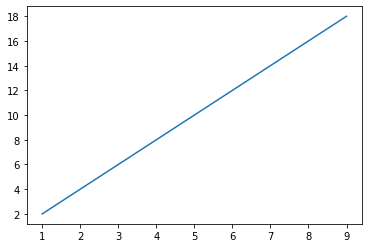

In [87]:
import matplotlib.pyplot as plt
plt.plot(list(range(1,10)),list(map(lambda x:2*x,range(1,10))))
plt.show()

**Ex. 5:** Take a pack of playing cards, shuffle them, and deal out sixteen cards face upwards in a four-by-four square. Into a four-by-four matrix write + if the card in the corresponding place is black and o if it is red. Try some examples and identify the type of each, as in *Ex. 2*.

**Answer:** There are an even number of red and black cards, so a random binary 4x4 matrix is equivalent to this exercise. 

In [88]:
rand_mat = np.random.randint(2, size=(4,4))
rand_mat

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1]])

In [89]:
rand_transform = FiniteTransformation.matrix_to_transformation(rand_mat)
rand_transform.matrix_representation()

,0,1,2,3
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0


In [90]:
print("Is rand_transform one-to-one: {0}".format(rand_transform.is_one_one()))
print("Is rand_transform single-valued: {0}".format(rand_transform.is_single_valued()))

Is rand_transform one-to-one: False
Is rand_transform single-valued: False


**Question:** What is the probability of randomly generating a one-to-one transformation in the above exercise? 

**Answer:**
$$P(\text{one-to-one matrix} \;|\; 4\times4 \text{ random binary matrix}) = \frac{5^4}{2^{4\cdot4}} \approx 0.009536$$

Note: The numerator is $5^4$ instead of $4^4$ because we need to add one for the possiblity of a column of zeros. 

**Question:** What is the probability of randomly generating a single-valued transformation in the above exercise? 

**Answer:** The same probability as the previous question, for obvious reasons. 

**Ex. 6:** When there are two operands and the transformation is closed, how many different matrices are there?

**Answer:** $2^4-4=12$

**Ex. 7:** (Continued). How many are single-valued ?

**Answer:** $2^4-7=9$

In [91]:
single_value_count = 0
closed_count = 0
one_to_one_count = 0

for i in range(16):
    rand_mat = np.array(list(map(int,np.binary_repr(i, width=4)))).reshape((2,2))
    trans = FiniteTransformation.matrix_to_transformation(rand_mat)
    if trans.closed():
        closed_count += 1
    if trans.is_one_one():
        one_to_one_count += 1
    if trans.is_single_valued():
        single_value_count += 1

print("#closed: {0}".format(closed_count))
print("#single value: {0}".format(single_value_count))
print("#one-to-one: {0}".format(one_to_one_count))

#closed: 12
#single value: 9
#one-to-one: 9


### 2/11. Power

In [92]:
def find_identity_power(finite_transformation, val):
    cntr = 2
    while True:
        if finite_transformation.power(cntr).operator(val) == val:
            return cntr
        else:
            cntr += 1

In [93]:
identity_power = find_identity_power(CharTranspose,"A")
identity_power

26

In [94]:
CharTranspose.power(identity_power).operator("A")

'A'

In [95]:
CharTranspose.matrix_representation()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
B,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
CharTranspose.power(2).matrix_representation()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Ex. 1:** Given:

A: $\downarrow a \; b \; c \;  \\  \;\; c\; c \; a' \; $

What is $A^2$?

In [97]:
A = FiniteTransformation.transitions_to_transformation([("a","c"),("b","c"),("c","a'")])
A.matrix_representation()

,a,b,c
a',0.0,0.0,1.0
c,1.0,1.0,0.0


In [98]:
# A2 = A.power(2)
# Will give an error.

We get an error because this operation is not closed. The value "a'" is not in the set of operands for this transformation, so when we try to call the operator on this value, a domain error is raised. 

In [99]:
A.closed()

False

**Ex. 2:** Write down some identity transformation; what is its square?

In [100]:
Identity = FiniteTransformation([1,2,3,4],lambda x: x)
Identity.matrix_representation()

,1,2,3,4
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


In [101]:
Identity.power(2).matrix_representation()

,1,2,3,4
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


In [102]:
Identity.power(11).matrix_representation()

,1,2,3,4
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


The identity transformation is invariant 

**Ex. 3:** (See Ex. 2/4/3.) What is $A^2$?

In [103]:
A = FiniteTransformation.transitions_to_transformation([("a","a"),("b","a"),("c","a"),("d","a")])
A.matrix_representation()

,a,b,c,d
a,1.0,1.0,1.0,1.0


In [104]:
A.power(2).matrix_representation()

,a,b,c,d
a,1.0,1.0,1.0,1.0


**Ex. 4:** What transformation is obtained when the transformation $n' = n+1$ is applied twice to the positive integers? Write the answer in abbreviated
form, as $n' =$ . . . . (Hint: try writing the transformation out in full as in S.2/4.)

In [105]:
AddOne = FiniteTransformation([1,2,3,4,5],lambda x: x+1)
AddOne.matrix_representation()

,1,2,3,4,5
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0


In [106]:
AddOne.power(2).matrix_representation()

,1,2,3,4,5
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0


**Ex. 5:** What transformation is obtained when the transformation $n' = 7n$ is applied twice to the positive integers?

In [107]:
MulSeven = FiniteTransformation([1,2,3,4,5],lambda x: 7*x)
MulSeven.matrix_representation()

,1,2,3,4,5
7,1.0,0.0,0.0,0.0,0.0
14,0.0,1.0,0.0,0.0,0.0
21,0.0,0.0,1.0,0.0,0.0
28,0.0,0.0,0.0,1.0,0.0
35,0.0,0.0,0.0,0.0,1.0


In [108]:
MulSeven.power(2).matrix_representation()

,1,2,3,4,5
49,1.0,0.0,0.0,0.0,0.0
98,0.0,1.0,0.0,0.0,0.0
147,0.0,0.0,1.0,0.0,0.0
196,0.0,0.0,0.0,1.0,0.0
245,0.0,0.0,0.0,0.0,1.0


**Ex. 6:**

In [109]:
K = FiniteTransformation.transitions_to_transformation([("B","A"),("C","A"),("A","C")])
K.matrix_representation()

,A,B,C
A,0.0,1.0,1.0
C,1.0,0.0,0.0


In [110]:
K.power(2).matrix_representation()

,A,B,C
A,1.0,0.0,0.0
C,0.0,1.0,1.0


**Ex. 7:** Try to apply the transformation W twice.

In [111]:
W = FiniteTransformation.transitions_to_transformation([("f","g"),("g","h"),("h","k")])
W.matrix_representation()

,f,g,h
g,1.0,0.0,0.0
h,0.0,1.0,0.0
k,0.0,0.0,1.0


In [112]:
# W.power(2)
# Will give an error. 

### 2/15. Function Notation
**Ex. 1:**

In [113]:
f = FiniteTransformation.transitions_to_transformation([(1,3),(2,1),(3,2)])
f.matrix_representation()

,1,2,3
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0


In [114]:
f.operator(3)

2

In [115]:
f.operator(1)

3

In [116]:
f.power(2).operator(3) == f.operator(f.operator(3))

True

**Ex. 2:** Write out in full the transformation *g* on the operands: $6, 7, 8$, if $g(6) = 8$, $g(7) = 7$, $g(8) = 8$.

In [117]:
out_dict = {6:8,7:7,8:8}
FiniteTransformation([6,7,8], lambda operand: out_dict[operand]).matrix_representation()

,6,7,8
7,0.0,1.0,0.0
8,1.0,0.0,1.0


**Ex. 3:** Write out in full the transformation *h* on the operands: $\alpha, \beta, \chi, \delta$, if $h(\alpha)=\chi$, $h^2(\alpha)=\beta$, $h^3(\alpha) = \delta$ , $h^4(\alpha) = \alpha$.

In [118]:
out_dict = {"𝛼":"𝜒","𝜒":"𝛽","𝛽":"𝛿","𝛿":"𝛼"}
h = FiniteTransformation(["𝛼","𝜒","𝛽","𝛿"], lambda operand: out_dict[operand])
h.matrix_representation()

,𝛼,𝛽,𝛿,𝜒
𝛼,0.0,0.0,1.0,0.0
𝛽,0.0,0.0,0.0,1.0
𝛿,0.0,1.0,0.0,0.0
𝜒,1.0,0.0,0.0,0.0


In [119]:
print("h(𝛼)={0}".format(h.operator("𝛼")))
print("h^2(𝛼)={0}".format(h.power(2).operator("𝛼")))
print("h^3(𝛼)={0}".format(h.power(3).operator("𝛼")))
print("h^4(𝛼)={0}".format(h.power(4).operator("𝛼")))

h(𝛼)=𝜒
h^2(𝛼)=𝛽
h^3(𝛼)=𝛿
h^4(𝛼)=𝛼


**Ex. 4:** If $A(n)$ is $n + 2$, what is $A(15)$?

In [120]:
FiniteTransformation(range(16),lambda x: x+2).power(15).operator(2)

32

**Ex. 5:** If $f(n)$ is $–n^2 + 4$, what is $f(2)$?

In [121]:
FiniteTransformation([2],lambda operand: -operand**2 + 4).operator(2)

0

**Ex. 6:** If $T(n)$ is $3n$, what is $T^2(n)$ ? (Hint: if uncertain, write out T in *extenso*.)

In [122]:
FiniteTransformation([1,2,3,4], lambda operand: 3*operand).power(2).matrix_representation()

,1,2,3,4
9,1.0,0.0,0.0,0.0
18,0.0,1.0,0.0,0.0
27,0.0,0.0,1.0,0.0
36,0.0,0.0,0.0,1.0


**Ex. 7:** If I is an identity transformation, and *t* one of its operands, what is $I(t)$?

In [123]:
FiniteTransformation(["t"],lambda operand: operand).operator("t")

't'

### 2/16. Product.

In [124]:
T = FiniteTransformation.transitions_to_transformation([("a","b"),("b","d"),("c","a"),("d","b")])
U = FiniteTransformation.transitions_to_transformation([("a","d"),("b","c"),("c","d"),("d","b")])
V = U*T
V.transitions()

[('a', 'c'), ('b', 'b'), ('c', 'd'), ('d', 'c')]

In [125]:
W = T*U
W.transitions()

[('a', 'b'), ('b', 'a'), ('c', 'b'), ('d', 'd')]

**Ex. 1:** Write out in full the transformation $U^2T$.

In [126]:
(U.power(2)*T).transitions()

[('a', 'd'), ('b', 'c'), ('c', 'b'), ('d', 'd')]

**Ex. 2:** Write out in full: $UTU$.

**Ex. 3:** Represent $T$ and $U$ by matrices and then multiply these two matrices in the usual way (rows into columns), letting the product and sum of +’s be +: call the resulting matrix $M_1$. Represent $V$ by a matrix, call it $M_2$. Compare $M_1$ and $M_2$.

In [127]:
# M1 = np.dot(T.matrix_representation().values,U.matrix_representation().values)
# I represent the matrix of the transformation in a different way than Ashby does. For this exercise to work, we'd need the matrix
# which represents T and U to be square matricies, but that would require us to have an empty row for c, which is not 
# represented in the set of transforms, but is expected to be there under Ashby's scheme. 

### 2/17. Kinematic graph.

In [128]:
U = FiniteTransformation.transitions_to_transformation([("A","D"),("B","A"),("C","E"),("D","D"),("E","D")])

In [145]:
U.power_chain("C",5)

['C', 'E', 'D', 'D', 'D']

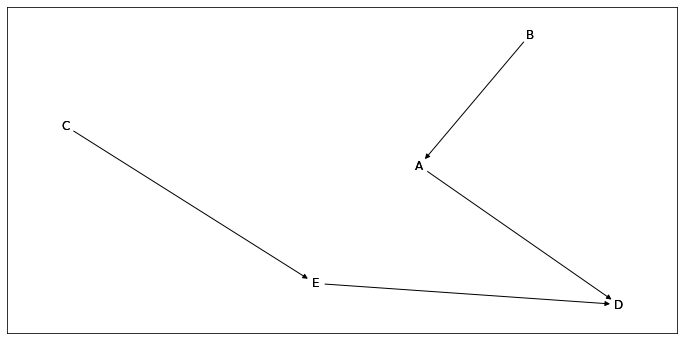

In [146]:
U.kinematic_graph()

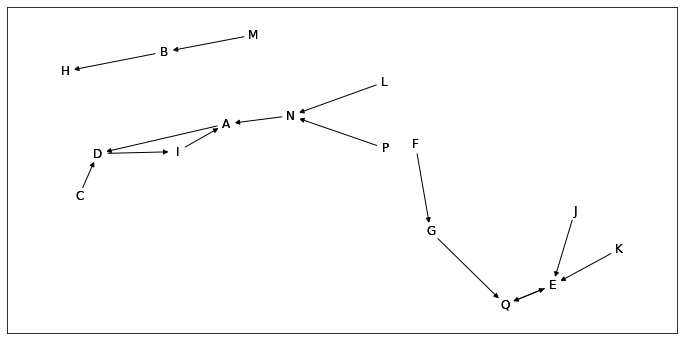

In [131]:
transitions = [("A","D"),("B","H"),("C","D"),("D","I"),("E","Q"),("F","G"),("G","Q"),("H","H"),("I","A"),
               ("J","E"),("K","E"),("L","N"),("M","B"),("N","A"),("P","N"),("Q","E")]
T = FiniteTransformation.transitions_to_transformation(transitions)
T.kinematic_graph()

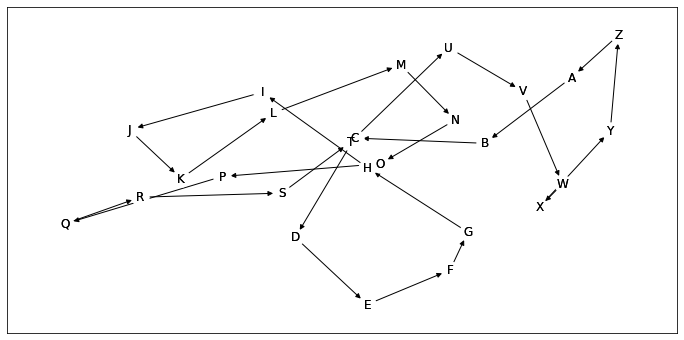

In [132]:
CharTranspose.kinematic_graph()

**Ex. 2:** How can the graph of an identical transformation be recognised at a glance?

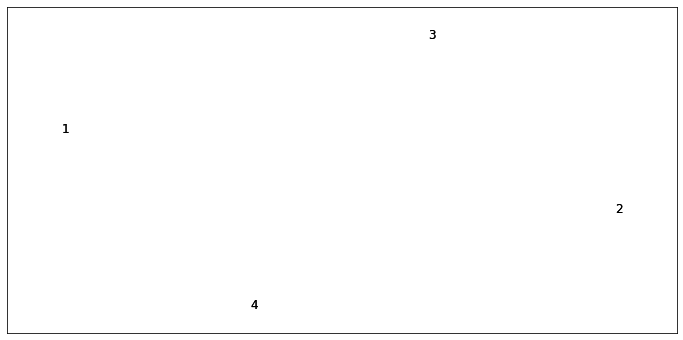

In [133]:
Identity.kinematic_graph()

**Answer:** There will be no edges between elements, only self edges (which are not shown in my diagrams).

**Ex. 3:** Draw the graphs of some simple closed one-one transformations. What is their characteristic feature?

In [134]:
T = FiniteTransformation.transitions_to_transformation([("A","B"),("B","C"),("C","A")])

In [135]:
T.closed()

True

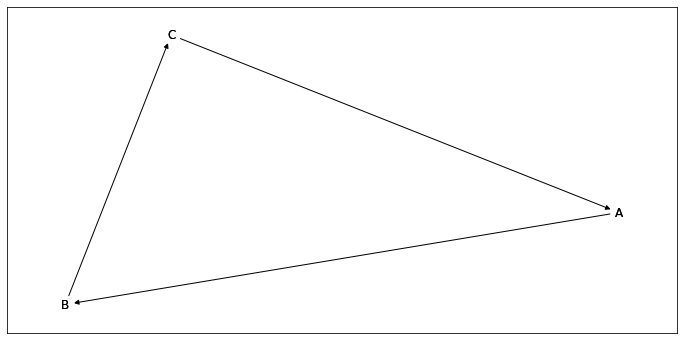

In [136]:
T.kinematic_graph()

**Ex. 4:** Draw the graph of the transformation $V$ in which $n$, is the third decimal digit of $log_{10}(n + 20)$ and the operands are the ten digits $0, 1, \ldots, 9$.

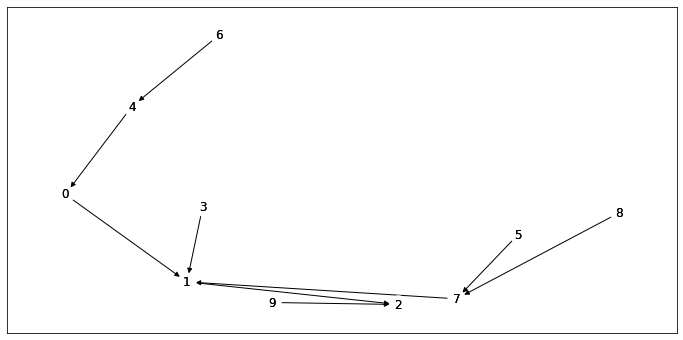

In [137]:
V = FiniteTransformation(range(0,10),lambda n: int(str(np.log10(n+20)%1)[4]))
V.kinematic_graph()

In [138]:
V.closed()

True

**Ex. 5:** (Continued) From the graph of $V$ read off at once what is $V(8)$, $V^2(4)$, $V^4(6)$, $V^{84}(5)$.

In [139]:
V.operator(8)

7

In [140]:
V.power(2).operator(4)

1

In [141]:
V.power(4).operator(6)

2

In [142]:
V.power(84).operator(5)

2

We could have seen from the graph above that $V^{84}(5) = 2$ because once we arrive at 2, the system reproduces that state into infinity. 

**Ex. 6:** If the transformation is one-one, can two arrows come to a single point?

**Answer:** Two arrows coming to a single point implies two operands that have the same transform, which is not one-to-one. 

**Ex. 7:** If the transformation is many-one, can two arrows come to a single point? 

**Answer:** Yes.

**Ex. 9:** If the transformation is single-valued, can one basin contain two cycles?

**Answer:** No, because if a transformation is single-valued, there's no element which has two outgoing arrows, therefore there is no branching. 

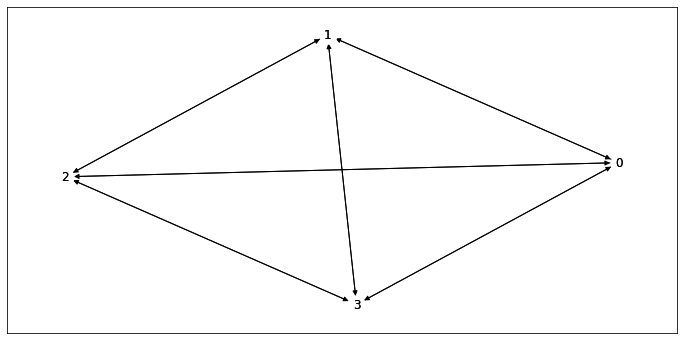

In [143]:
FiniteTransformation.matrix_to_transformation(np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])).kinematic_graph()